# Stochastic Gradient Descent (SGD)

When training a Machine Learning model, we typically deal with a dataset  

$$
(X, Y) = \{ (x^{(i)}, y^{(i)}) \}_{i=1}^N,
$$

and a **parametric model** $ f_\Theta(x) $ whose parameters $\Theta \in \mathbb{R}^d$ (also called **weights**) must be learned.  
The **training phase** is formulated as an **optimization problem**, where we seek parameters $\Theta$ such that

$$
f_\Theta(x^{(i)}) \approx y^{(i)} \quad \text{for all } i=1,\dots,N.
$$

To quantify this approximation, we introduce a **loss function** $\mathcal{L}(\Theta; X, Y)$, which measures how far the model predictions are from the true targets.

## Empirical Risk Minimization

In most ML problems, the loss can be expressed as a sum (or average) over **sample-wise losses**:

$$
\mathcal{L}(\Theta; X, Y) = \frac{1}{N} \sum_{i=1}^N \ell_i(\Theta; x^{(i)}, y^{(i)}),
$$

where $\ell_i$ quantifies the error for the $i$-th training sample.

The training optimization problem becomes:

$$
\Theta^* = \arg\min_\Theta \, \mathcal{L}(\Theta; X, Y)
         = \arg\min_\Theta \, \frac{1}{N}\sum_{i=1}^N \ell_i(\Theta; x^{(i)}, y^{(i)}).
$$


The **Gradient Descent (GD)** method updates the parameters iteratively as:

$$
\begin{cases}
\Theta^{(0)} \in \mathbb{R}^d, 
\Theta^{(k+1)} = \Theta^{(k)} - \alpha_k \, \nabla_\Theta \mathcal{L}(\Theta^{(k)}; X, Y)
= \Theta^{(k)} - \alpha_k \, \frac{1}{N}\sum_{i=1}^N \nabla_\Theta \ell_i(\Theta^{(k)}; x^{(i)}, y^{(i)}).
\end{cases}
$$


Here $\alpha_k > 0$ denotes the **learning rate** (or step size).

## Example: Mean Squared Error (MSE)

A common loss in regression problems is the **Mean Squared Error (MSE)**:

$$
\mathcal{L}(\Theta; X, Y) = \frac{1}{N}\sum_{i=1}^N (f_\Theta(x^{(i)}) - y^{(i)})^2
= \sum_{i=1}^N \underbrace{\frac{1}{N}(f_\Theta(x^{(i)}) - y^{(i)})^2}_{=: \ell_i(\Theta; x^{(i)}, y^{(i)})}.
$$


By the chain rule:

$$
\nabla_\Theta \ell_i(\Theta; x^{(i)}, y^{(i)}) 
= \frac{2}{N}\,(f_\Theta(x^{(i)}) - y^{(i)}) \, \nabla_\Theta f_\Theta(x^{(i)}),
$$

so that:

$$
\nabla_\Theta \mathcal{L}(\Theta; X, Y) 
= \frac{2}{N}\sum_{i=1}^N (f_\Theta(x^{(i)}) - y^{(i)})\,\nabla_\Theta f_\Theta(x^{(i)}).
$$


Therefore, one iteration of Gradient Descent becomes:

$$
\Theta^{(k+1)} = \Theta^{(k)} - \alpha_k \frac{2}{N}\sum_{i=1}^N (f_\Theta(x^{(i)}) - y^{(i)})\,\nabla_\Theta f_\Theta(x^{(i)}).
$$


## Motivation for Stochastic Gradient Descent

While the computation of each $\nabla_\Theta \ell_i(\Theta; x^{(i)}, y^{(i)})$ is inexpensive,  
the full gradient $\nabla_\Theta \mathcal{L}(\Theta; X, Y)$ requires summing over all $N$ samples — a prohibitive cost when $N$ is very large.

The **Stochastic Gradient Descent (SGD)** algorithm addresses this by replacing the **exact gradient** with a **stochastic approximation** computed on a random subset of data (a *mini-batch*).

## The SGD Algorithm

Let $N_\text{batch} \ll N$ be the **batch size**, and let $\mathcal{M}_k \subset \{1,\dots,N\}$ denote a random subset of indices such that $|\mathcal{M}_k| = N_\text{batch}$.

At each iteration $k$:

1. **Sample a mini-batch:**  
   Randomly select a subset $\mathcal{M}_k$ from the dataset (typically without replacement).

2. **Compute the approximate gradient:**  
   
   $$
   \nabla_\Theta \mathcal{L}(\Theta^{(k)}; \mathcal{M}_k)
   = \frac{1}{N_\text{batch}}\sum_{i\in\mathcal{M}_k} \nabla_\Theta \ell_i(\Theta^{(k)}; x^{(i)}, y^{(i)}).
   $$


3. **Update the parameters:**
   
   $$
   \Theta^{(k+1)} = \Theta^{(k)} - \alpha_k \, \nabla_\Theta \mathcal{L}(\Theta^{(k)}; \mathcal{M}_k).
   $$


4. **Repeat** until all data have been used once.  
   When the entire dataset has been processed, we say one **epoch** of SGD has been completed.  
   The algorithm is typically run for a fixed number $E$ of epochs.

## Comparison with Full Gradient Descent

| Property | Gradient Descent (GD) | Stochastic Gradient Descent (SGD) |
|-----------|------------------------|------------------------------------|
| Gradient computation | Full dataset | Random subset (mini-batch) |
| Iteration cost | High (depends on $N$) | Low (depends on $N_\text{batch}$) |
| Variance | Deterministic | Stochastic |
| Convergence | Smooth and stable | Noisy, but often faster |
| Scalability | Poor for large datasets | Excellent |

The stochasticity introduces **noise** in the parameter updates, but this noise can help the optimizer **escape shallow local minima** and often improves generalization.

## Typical Implementation

Below is a reference Python-like pseudocode for SGD (for educational purposes only):

In [1]:
import numpy as np

def SGD(f, grad_f, X, Y, theta0, lr=1e-2, batch_size=32, epochs=10):
    """
    Simplified Stochastic Gradient Descent (SGD) implementation.
    f: loss function, grad_f: gradient wrt theta
    X, Y: dataset
    theta0: initial parameters
    lr: learning rate
    """
    theta = theta0.copy()
    N = len(X)
    for epoch in range(epochs):
        # Shuffle data indices
        idx = np.random.permutation(N)
        for start in range(0, N, batch_size):
            batch_idx = idx[start:start+batch_size]
            grad = grad_f(theta, X[batch_idx], Y[batch_idx])
            theta -= lr * grad
    return theta


## Remarks

- The **batch size** controls the trade-off between computational cost and gradient accuracy.  
  Small batches introduce more stochastic noise; large batches approach full GD behavior.  

- The **learning rate** $\alpha_k$ is usually constant or follows a decaying schedule, e.g.
  
  $$
  \alpha_k = \frac{\alpha_0}{1 + \gamma k}, \quad \gamma > 0.
  $$


- In practice, modern optimizers (e.g. Adam, RMSProp) extend SGD with adaptive step-sizes and momentum, which we will discuss later in the course.

> **Exercise (Mini-Batch Approximation):**  
> Consider the function  
> 
$$
> \mathcal{L}(\Theta; X, Y) = \frac{1}{N}\sum_{i=1}^N (\Theta^\top x^{(i)} - y^{(i)})^2.
> $$

> 1. Implement Gradient Descent and Stochastic Gradient Descent for this loss.  
> 2. Compare the number of iterations and the computational cost.  
> 3. Plot the evolution of the loss across epochs for different batch sizes ($N_\text{batch} = 1, 10, N$).  

> **Exercise (Variance of the Stochastic Gradient):**  
> For the same quadratic loss, compute the gradient over multiple random batches $\mathcal{M}_k$ of the same size, and compare:  
> 
$$
> \mathrm{Var}\big(\nabla_\Theta \mathcal{L}(\Theta; \mathcal{M}_k)\big)
> $$

> as a function of the batch size.  
> Discuss how increasing $N_\text{batch}$ affects the variance and the convergence stability.  

> **Exercise (Learning Rate Scheduling):**  
> Implement SGD on the same dataset with three learning-rate strategies:  
> constant $\alpha_k=\alpha_0$, exponentially decaying $\alpha_k = \alpha_0 \, e^{-\gamma k}$, and inverse scaling $\alpha_k = \frac{\alpha_0}{1+\gamma k}$.  
> Compare convergence rates and discuss which choice balances speed and stability better.  

## A Complete Example: Multi-Linear Regression with GD and SGD

To conclude our discussion on Gradient Descent and its stochastic variant, we now consider a **complete example** where we will implement both algorithms *from scratch* (i.e., using only `numpy`) to solve a **multi-linear regression** problem on a real dataset.

This exercise will help you understand how both **Gradient Descent (GD)** and **Stochastic Gradient Descent (SGD)** behave in a real training scenario and how different choices (e.g., batch size, learning rate) affect convergence.

### The Dataset

We will use the **"House Prices – Advanced Regression Techniques"** dataset from Kaggle:  
🔗 [https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

The dataset contains various features describing houses (e.g., number of rooms, area, year built) and the **sale price** as the target variable.

For simplicity, we will use only a few continuous variables, for example:
- `LotArea` (the area of the lot in square feet),
- `OverallQual` (an overall quality rating),
- `YearBuilt` (the construction year).

Our goal is to predict the house price $ y $ using a linear model:

$$
f_\Theta(x) = \Theta^\top x,
$$

where $x \in \mathbb{R}^d$ is the feature vector (including a bias term), and $\Theta \in \mathbb{R}^d$ are the model parameters.

### 1. Problem Definition

We define the **Mean Squared Error (MSE)** loss function as:

$$
\mathcal{L}(\Theta; X, Y) = \frac{1}{N}\sum_{i=1}^N (f_\Theta(x^{(i)}) - y^{(i)})^2
= \frac{1}{N}\|X\Theta - Y\|_2^2,
$$

where $X$ is the data matrix of shape $(N, d)$ and $Y$ the vector of targets.

The gradient of the loss with respect to $\Theta$ is:

$$
\nabla_\Theta \mathcal{L}(\Theta; X, Y) = \frac{2}{N} X^\top (X\Theta - Y).
$$


### 2. Data Preprocessing

The first step is to:
- Load the dataset (you can download the `.csv` file from Kaggle),
- Select the numerical columns we are interested in,
- Normalize them to have mean 0 and variance 1,
- Add a **bias column** of ones to $X$.

In [2]:
import numpy as np
import pandas as pd

# Load the dataset (download from Kaggle first)
df = pd.read_csv("data/train.csv")

# Select some useful continuous features
features = ["LotArea", "OverallQual", "YearBuilt"]
X = df[features].values
Y = df["SalePrice"].values.reshape(-1, 1)

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add bias term
X = np.hstack([np.ones((X.shape[0], 1)), X])
N, d = X.shape
print(f"Dataset size: {N} samples, {d} features (including bias)")

Dataset size: 1460 samples, 4 features (including bias)


### 3. Implementing Gradient Descent

We now implement Gradient Descent using the formula

$$
\Theta^{(k+1)} = \Theta^{(k)} - \alpha \, \nabla_\Theta \mathcal{L}(\Theta^{(k)}; X, Y).
$$

In [3]:
def compute_loss(X, Y, Theta):
    N = len(Y)
    residuals = X @ Theta - Y
    return (residuals**2).mean()

def compute_grad(X, Y, Theta):
    N = len(Y)
    return (2/N) * X.T @ (X @ Theta - Y)

def gradient_descent(X, Y, lr=1e-3, epochs=500):
    Theta = np.zeros((X.shape[1], 1))
    losses = []
    for k in range(epochs):
        grad = compute_grad(X, Y, Theta)
        Theta -= lr * grad
        losses.append(compute_loss(X, Y, Theta))
    return Theta, losses

### 4. Implementing Stochastic Gradient Descent

For SGD, at each iteration we approximate the full gradient by sampling a random **mini-batch** $\mathcal{M}_k$ of size $N_\text{batch}$:

$$
\nabla_\Theta \mathcal{L}(\Theta; \mathcal{M}_k) = \frac{2}{N_\text{batch}} X_{\mathcal{M}_k}^\top (X_{\mathcal{M}_k}\Theta - Y_{\mathcal{M}_k}).
$$

In [4]:
def sgd(X, Y, lr=1e-3, batch_size=64, epochs=50):
    Theta = np.zeros((X.shape[1], 1))
    N = len(Y)
    losses = []
    for epoch in range(epochs):
        indices = np.random.permutation(N)
        for start in range(0, N, batch_size):
            batch_idx = indices[start:start+batch_size]
            Xb, Yb = X[batch_idx], Y[batch_idx]
            grad = (2/len(Yb)) * Xb.T @ (Xb @ Theta - Yb)
            Theta -= lr * grad
        losses.append(compute_loss(X, Y, Theta))
    return Theta, losses

### 5. Training and Comparison

We can now train both algorithms and compare their convergence.

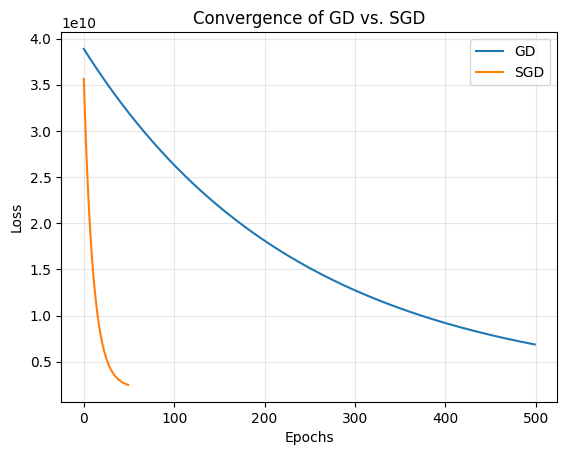

In [5]:
# Run both GD and SGD
Theta_gd, loss_gd = gradient_descent(X, Y, lr=1e-3, epochs=500)
Theta_sgd, loss_sgd = sgd(X, Y, lr=1e-3, batch_size=64, epochs=50)

import matplotlib.pyplot as plt
plt.plot(loss_gd, label="GD")
plt.plot(loss_sgd, label="SGD")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Convergence of GD vs. SGD")
plt.grid(alpha=0.3)
plt.show()


### 6. Discussion

- **Gradient Descent (GD)** computes the exact gradient at each iteration, ensuring smooth convergence, but is computationally expensive for large datasets.  
- **SGD**, by using mini-batches, introduces stochastic noise in the updates but drastically reduces computational cost per iteration.  
  This noise can even **help** avoid getting stuck in local minima (for non-convex problems) and improves generalization.  
- The **learning rate** and **batch size** jointly control the trade-off between convergence speed and stability.

You should experiment with:
- Different values of `lr` (e.g., `1e-2`, `5e-4`),
- Different batch sizes (`N_batch = 1, 32, 128, N`),
- And normalization (try running without standardization to see instability).

### 7. Questions for Reflection

1. Compare the convergence curves of GD and SGD. Which is smoother? Which converges faster in terms of time per epoch?  
2. How does batch size influence the final convergence point and oscillations?  
3. If you replace the fixed learning rate with a decaying schedule (e.g. $\alpha_k = \frac{\alpha_0}{1+k}$), how does the behavior change?  
4. Compute the norm of the final gradient $\|\nabla_\Theta \mathcal{L}(\Theta^{(E)}; X, Y)\|$ for both algorithms and interpret its value.

This exercise consolidates all the concepts discussed so far:
- decomposition of the loss as a sum over samples,
- explicit computation of gradients,
- iterative updates via Gradient Descent and SGD,
- and the trade-offs between accuracy, stability, and computational cost.

You are now ready to apply these methods to more complex models (e.g. logistic regression or neural networks), where SGD remains the core optimization strategy.

## Adam: Adaptive Moment Estimation

**Adam** is an optimization algorithm that improves on standard SGD by using both  
**momentum** (to accelerate convergence) and **adaptive learning rates** (to handle parameters with different scales).

Given a stochastic gradient at iteration \(k\),

$$
g^{(k)} \;=\; \nabla_\Theta \mathcal{L}\big(\Theta^{(k)}; \mathcal{M}_k\big),
$$

Adam maintains two **exponential moving averages (EMAs)**:

$$
\begin{aligned}
m^{(k)} &= \beta_1\, m^{(k-1)} + (1-\beta_1)\, g^{(k)} &&\text{(first moment: mean of gradients)}\\[4pt]
v^{(k)} &= \beta_2\, v^{(k-1)} + (1-\beta_2)\, (g^{(k)})^2 &&\text{(second moment: variance of gradients)}
\end{aligned}
$$

After correcting the initialization bias:

$$
\hat m^{(k)} = \frac{m^{(k)}}{1-\beta_1^k}, 
\qquad 
\hat v^{(k)} = \frac{v^{(k)}}{1-\beta_2^k},
$$

the parameter update is:

$$
\Theta^{(k+1)} = \Theta^{(k)} - \alpha\, \frac{\hat m^{(k)}}{\sqrt{\hat v^{(k)}} + \varepsilon}.
$$

Typical choices:  
\(\beta_1=0.9, \; \beta_2=0.999, \; \varepsilon = 10^{-8}\).

### Why Normalization Matters

Before applying Adam (or any gradient-based optimizer), it is essential to **normalize or standardize the data**.

1. **Balanced feature scales:**  
   Features measured in different units (e.g., square meters, years, ratings) produce gradients of very different magnitudes, making the loss landscape highly anisotropic and ill-conditioned.

2. **Stable updates:**  
   Adam adapts learning rates *per parameter* based on the running averages of gradients and squared gradients. If features or target values have very different scales, the computed \(v^{(k)}\) can vary by orders of magnitude across dimensions, leading to unstable or diverging updates.

3. **Faster and smoother convergence:**  
   Centering and scaling features makes the contours of the loss more spherical, helping gradient-based methods move more directly toward the minimum.

Hence, we always **standardize both the features and the target** in regression tasks:

$$
x_j \leftarrow \frac{x_j - \mu_j}{\sigma_j}, 
\quad
y \leftarrow \frac{y - \mu_y}{\sigma_y}.
$$

After training, predictions can be **denormalized** back to the original scale.

### Implementing Adam with Standardized Data

We reuse the Kaggle *House Prices* dataset but now **normalize both inputs and outputs** before training.

In [6]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("data/train.csv")

# Select features
features = ["LotArea", "OverallQual", "YearBuilt"]
X = df[features].values
Y = df["SalePrice"].values.reshape(-1, 1)

# === STANDARDIZATION ===
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
Y_mean, Y_std = Y.mean(), Y.std()

X = (X - X_mean) / X_std
Y = (Y - Y_mean) / Y_std

# Add bias column
X = np.hstack([np.ones((X.shape[0], 1)), X])
N, d = X.shape

def compute_loss(X, Y, Theta):
    residuals = X @ Theta - Y
    return (residuals**2).mean()

def compute_grad(X, Y, Theta):
    N = len(Y)
    return (2/N) * X.T @ (X @ Theta - Y)

### Adam Optimizer (with mini-batches)

In [7]:
def adam(
    X, Y, 
    lr=1e-4,                # smaller LR for stability
    beta1=0.9, beta2=0.999, eps=1e-8, 
    batch_size=128, 
    epochs=100,
    theta0=None,
    shuffle=True
):
    N, d = X.shape
    Theta = np.zeros((d, 1)) if theta0 is None else theta0.copy()

    m = np.zeros_like(Theta)
    v = np.zeros_like(Theta)
    t = 0
    losses = []

    for epoch in range(epochs):
        if shuffle:
            idx = np.random.permutation(N)
        else:
            idx = np.arange(N)

        for start in range(0, N, batch_size):
            batch_idx = idx[start:start+batch_size]
            Xb, Yb = X[batch_idx], Y[batch_idx]
            g = (2/len(Yb)) * Xb.T @ (Xb @ Theta - Yb)

            # Adam updates
            t += 1
            m = beta1 * m + (1 - beta1) * g
            v = beta2 * v + (1 - beta2) * (g * g)
            m_hat = m / (1 - beta1**t)
            v_hat = v / (1 - beta2**t)
            Theta -= lr * (m_hat / (np.sqrt(v_hat) + eps))

        losses.append(compute_loss(X, Y, Theta))

    return Theta, losses

### Comparison: SGD vs. Adam (with standardized data)

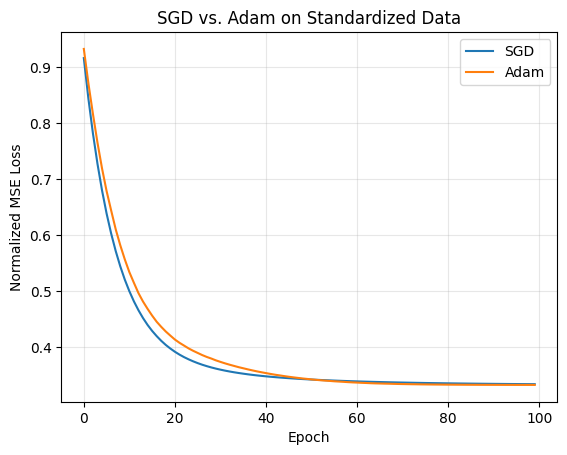

In [8]:
def sgd(X, Y, lr=1e-3, batch_size=64, epochs=100):
    Theta = np.zeros((X.shape[1], 1))
    losses = []
    N = len(Y)
    for epoch in range(epochs):
        idx = np.random.permutation(N)
        for start in range(0, N, batch_size):
            batch_idx = idx[start:start+batch_size]
            Xb, Yb = X[batch_idx], Y[batch_idx]
            grad = (2/len(Yb)) * Xb.T @ (Xb @ Theta - Yb)
            Theta -= lr * grad
        losses.append(compute_loss(X, Y, Theta))
    return Theta, losses

# Train both
Theta_sgd, loss_sgd = sgd(X, Y, lr=1e-3, batch_size=64, epochs=100)
Theta_adam, loss_adam = adam(X, Y, lr=1e-3, batch_size=64, epochs=100)

import matplotlib.pyplot as plt
plt.plot(loss_sgd, label="SGD")
plt.plot(loss_adam, label="Adam")
plt.xlabel("Epoch")
plt.ylabel("Normalized MSE Loss")
plt.title("SGD vs. Adam on Standardized Data")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Discussion

After standardization:

- Both **SGD** and **Adam** converge smoothly and to nearly identical minima.  
- **Adam** usually shows faster initial loss reduction due to its adaptive scaling of gradients.  
- Without normalization, the gradient magnitudes differ across parameters, causing Adam’s per-parameter learning rates to explode or vanish.  
- In normalized space, the curvature of the loss is more uniform, allowing adaptive methods like Adam to perform as intended.

Finally, when producing predictions in the original scale, remember to **denormalize** the output:

$$
\hat{y}_\text{real} = \hat{y}_\text{normalized} \cdot \sigma_Y + \mu_Y.
$$

```{warning}
SGD has some drawbacks compared to GD. In particular, there is no way to check whether it reached the convergence (since we can't obviously compute the gradient of $\ell(\theta; X, Y)$ to check its distance from zero, as it is required for the first Stopping Criteria) and we can't use the backtracking algorithm, for the same reason. As a consequence, the algorithm will stop ONLY after reaching the fixed number of epochs, and we must set a good value for the step size $\alpha_k$ by hand. Those problems are partially solved by recent algorithms like SGD with Momentum, Adam, AdaGrad, ... whose study is beyond the scope of the course.
```